# Exploratory Data Analysis

## 1. Load and Inspect Dataset
- Load the dataset from TensorFlow keras API.
- Display basic information about the dataset.


In [1]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

# data download, save and read
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from src.utils import dataset_utils as du
from src.utils import visualization_utils as vu

# prevent TensorFlow from allocating all the GPU memory at the start
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

# download data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# save data in the localhost
base_path = "/tf/projects/mnist-keras-ann-classifier/notebooks"
du.save_dataset((x_train, y_train, x_test, y_test), base_path, format='pickle')

# load the data saved locally
# x_train_loaded, y_train_loaded, x_test_loaded, y_test_loaded = du.load_dataset(base_path, format='pickle')

# assert (x_train == x_train_loaded).all()
# assert (y_train == y_train_loaded).all()
# assert (x_test == x_test_loaded).all()
# assert (y_test == y_test_loaded).all()

# print("Data saved and loaded successfully.")

    

2024-07-19 02:07:37.536966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 02:07:37.617700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 02:07:37.617813: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-19 02:07:37.668887: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-07-19 02:07:46.025691: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-19 02:07:46.046479: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-19 02:07:46.051737: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Dataset saved in pickle format at /tf/projects/mnist-keras-ann-classifier/notebooks
Dataset loaded from /tf/projects/mnist-keras-ann-classifier/notebooks
Data saved and loaded successfully.


## 2. Visualize Dataset
- Display some sample images from each class.

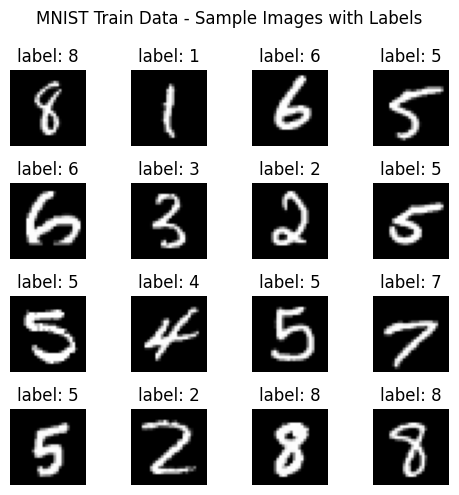

In [2]:
vu.visualize_sample_images_with_labels(x_train, y_train, 'MNIST Train Data')

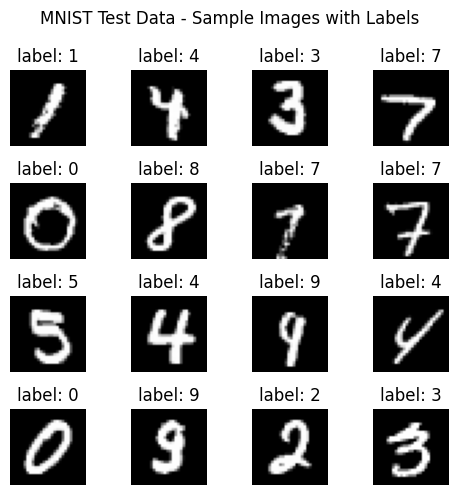

In [3]:
vu.visualize_sample_images_with_labels(x_test, y_test, 'MNIST Test Data')


## 3. Basic Statistics
- Calculate mean, median, standard deviation of image pixel values.

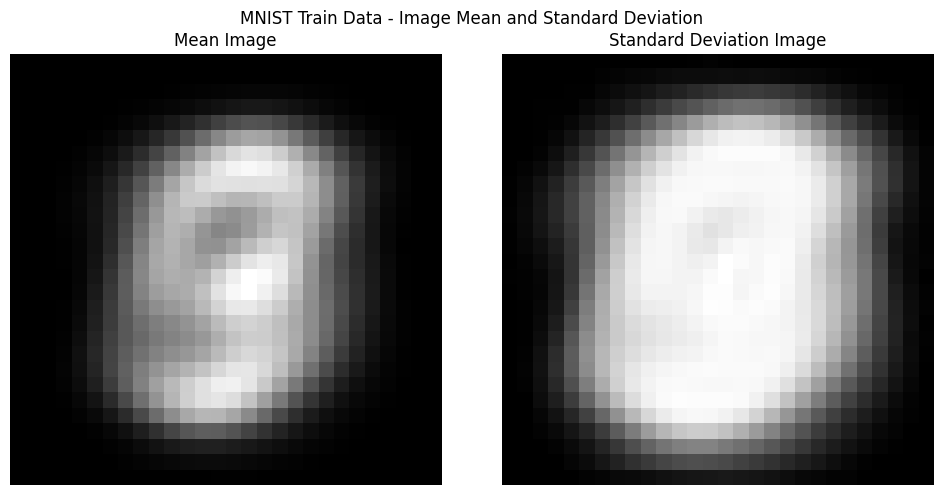

In [4]:
vu.visualize_image_mean_and_std(x_train, 'MNIST Train Data')

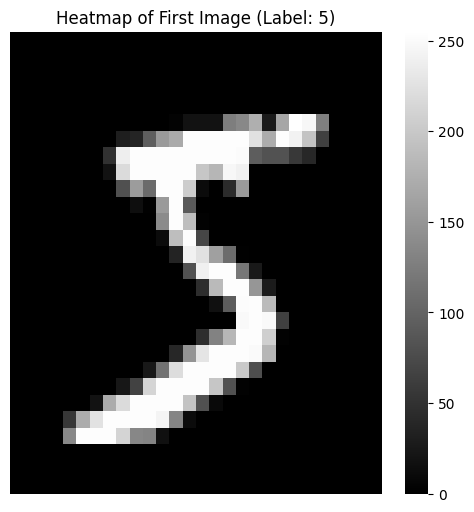

In [5]:
vu.visualize_heatmap_of_first_image(x_train, y_train, 'MNIST Train Data')



## 4. Class Distribution
- Plot the distribution of classes in the dataset.

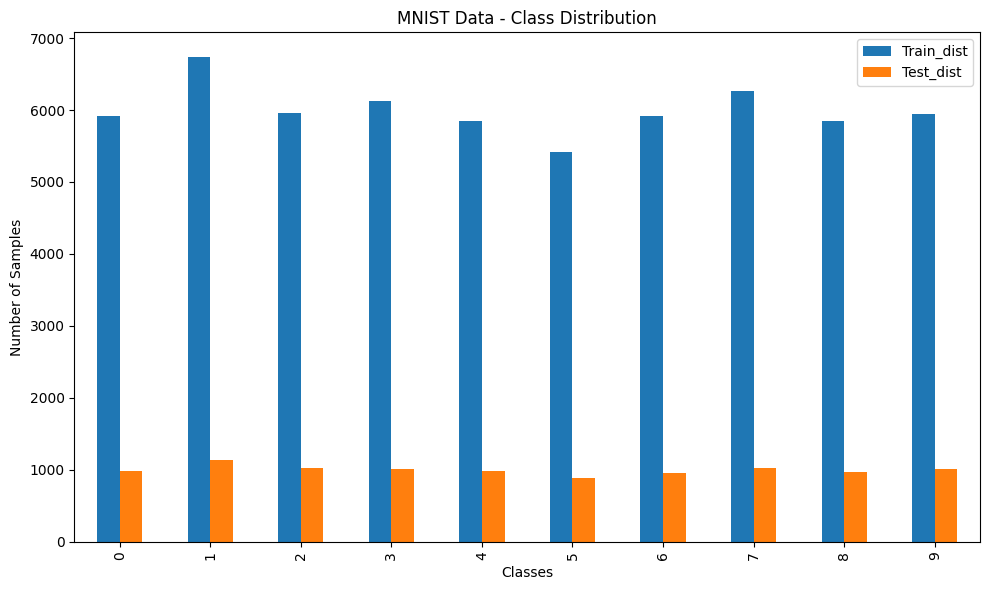

In [6]:
vu.visualize_class_distribution(y_train, y_test, 'MNIST Data')



## 5. Check for Missing or Corrupt Data
- Identify any missing labels or corrupt images.

In [7]:
missing_train = du.check_missing_data(x_train, y_train)
missing_test = du.check_missing_data(x_test, y_test)
print(f'Missing train data: {missing_train}')
print(f'Missing test data: {missing_test}')

Missing train data: 0
Missing test data: 0



## 6. Data Preprocessing
- Normalize and resize images.
- Display some images before and after preprocessing.

In [8]:
x_train, y_train = du.preprocess_mnist(x_train, y_train)

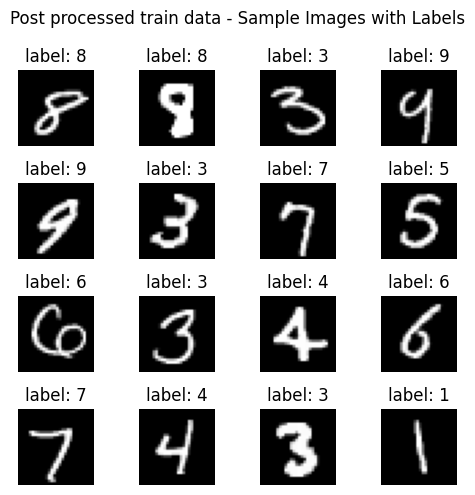

In [9]:
vu.visualize_sample_images_with_labels(x_train, y_train, 'Post processed train data')

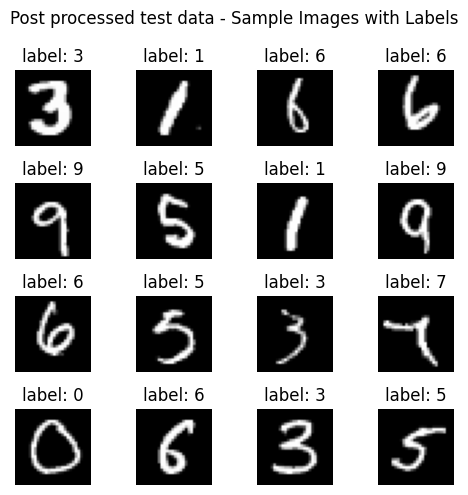

In [10]:
vu.visualize_sample_images_with_labels(x_test, y_test, 'Post processed test data')